In [2]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-11-11 21:38:19.578067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731341299.604150  137262 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731341299.612106  137262 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 21:38:19.640517: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = read_csv(r"NIFTY.csv", index_col = 'Date', parse_dates = True)
data = data.drop(columns = ['P/E'	,'P/B'	,'Div Yield %'])
sc = MinMaxScaler(feature_range = (0, 1))
nifty_data_scaled = sc.fit_transform(data)

In [4]:
Train = nifty_data_scaled[:2000]
Test = nifty_data_scaled[2000:]

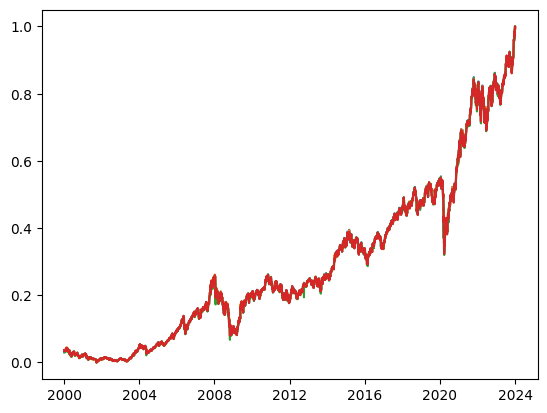

In [5]:
plt.plot(data.index , nifty_data_scaled , label = 'scaled close price')

In [6]:
n_input = 3
n_features = 4
generator = TimeseriesGenerator(Train, Train, length = n_input, batch_size = 1)

In [7]:
model = Sequential([
    SimpleRNN(100, input_shape = (n_input, n_features), activation = 'tanh'),
    Dense(4, activation = 'tanh')
])

W0000 00:00:1731341303.398645  137262 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(loss = "mse", optimizer = "adam")
model.fit(generator, epochs = 5)

Epoch 1/5


/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1997/1997 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.8263e-04
Epoch 2/5
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.7145e-05
Epoch 3/5
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.9596e-06
Epoch 4/5
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.2071e-06
Epoch 5/5
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.0046e-06


In [9]:
model.predict(generator[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[0.03548362, 0.03509868, 0.04082571, 0.03291559]], dtype=float32)

In [10]:
test_loss = model.evaluate(generator)
print(f'Test Loss : {test_loss}')

1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2984e-05
Test Loss : 2.6464871552889235e-05


In [11]:
x_test, y_test = generator[40]
prediction = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [12]:
print(f"Actual : {y_test[0 , 1]}, Predicted : {prediction[0, 0]}")
print(f"Actual : {y_test[0]}, Predicted : {prediction[0, 1]}")
print(f"Actual : {y_test[0]}, Predicted : {prediction[0, 2]}")
print(f"Actual : {y_test[0]}, Predicted : {prediction[0, 3]}")

Actual : 0.040183992728088244, Predicted : 0.04328228905797005
Actual : [0.04035965 0.04018399 0.03813805 0.03831872], Predicted : 0.04361771419644356
Actual : [0.04035965 0.04018399 0.03813805 0.03831872], Predicted : 0.04751644283533096
Actual : [0.04035965 0.04018399 0.03813805 0.03831872], Predicted : 0.04012949392199516
